# AD20 Documentation

Group 20: Lindsey Brown, Xinyue Wang, Kevin Yoon

# Table of Contents

**1. Introduction**

    1.1 Automatic Differentiation as a Solution to the Problem of Computing Derivatives
    1.2 Application of AD Techniques
    
**2. Background**

    2.1 Chain Rule
    2.2 Computational Graph Structure
    2.3 Dual Numbers
    2.4 Elementary Functions
    
**3. Package Usage**

    3.1 User Interaction
    3.2 Getting Started via Virtual Environments
    3.3 Importing AD20
    3.4 Instantiating AD20 Objects
    3.5 Newton's Method for a Scalar Valued Function
    3.6 Future Extensions of the Basic Scalar Implementation
    
**4. Software Organization**

    4.1 Directory Structure
    4.2 Modules and Functionality
    4.3 Testing and Coverage
    4.4 Package Distribution
    
**5. Implementation**

    5.1 Core Data Structures
    5.2 Implemented Classes, Methods, and Attributes
    5.3 External Dependencies
    5.4 Elementary Functions
    5.5 Future Implementation
    
**6. Project Extension**

    6.1 Computational Graphs and Tables

# 1. Introduction
The AD20 package performs the forward mode of automatic differentiation of user defined functions, evaluating both the function and its derivatives to machine precision.

## 1.1 Automatic Differentiation as a Solution to the Problem of Computing Derivatives

Differentiation is a fundamental operation for computational science. Used in a variety of applications from optimization to sensitivity analysis, differentiation is most useful when two conditions are met: it must be exact (up to machine precision) and computationally efficient.

Automatic differentiation (AD) (i.e. algorithmic differentiation, computational differentiation) computes the derivative of a function, unique for its ability to handle complex combinations of functions without sacrificing the accuracy. Regardless of how complex the function may be, AD takes advantage of the fact that the function can be decomposed into a sequence of elementary arithmetic operations (addition, subtraction, multiplication, division, etc.) and elementary functions (exp, log, sin, cos, etc.). 

Through computing the derivatives of these basic elementary functions and repeatedly applying the chain rule, AD meets the two aforementioned conditions and distinguishes itself from other modes of differentiation, namely numerical differentiation and symbolic differentiation. 

**Numerical Differentiation through Finite Difference Methods:** 
This class of techniques uses the definition of a derivative,
$$\frac{df(x)}{dt} = \lim_{h \rightarrow 0} \frac{f(x+h)-f(x)}{h}$$
to approximate the derivative by evaluating the right hand side for small $h$.  Such a technique is easy to code because it requires only defining and evaluating $f$, but it has limitations in precision due to truncation and roundoff errors, alongside the challenge of choosing an appropriately sized $h$.  While more complex finite difference schemes have been used to increase accuracy, all numerical differentiation remains only approximate with sensitivity to the choice in step size.

**Symbolic Differentiation:**
Symbolic differentiation addresses the shortcomings of approximation in numerical differentiation by computing derivatives to machine precision using expression trees, which quickly become inefficient to compute. 

Both of these options have been used in a variety of different applications to compute derivatives, but both have shortcomings that are addressed by automatic differentiation.  For this reason, for many computational applications, automatic differentiation is preferred:

- While numerical differentiation may be easy to implement and can flexibly handle any type of function, accuracy is sacrificed due to truncation and rounding errors - numerical differentiation serves more as an estimation technique based on small inputs. Unlike numerical differentiation, automatic differentiation does not rely on approximating the derivative through the choice of a small perturbation in the input, and instead computes derivatives exactly to machine precision, thus avoiding these accuracy and stability problems.


- While symbolic differentiation may ensure accuracy up to machine precision, computational efficiency is sacrified due to the nature of building complex expression trees. For complex functions, these expression trees can quickly become very large with many mathematical expressions. Unlike symbolic differentiation, automatic differentiation views functions as compositions of basic operations, remains accurate up to machine precision, and maintains computational efficiency since it does not require the buildup and evaluation of complex expression trees.
 
Thus, it is clear that automatic differentiation has advantages over other commonly used techniques for computing derivatives. These advantages make the use of AD attractive to many scientific applications. 

## 1.2 Application of AD Techniques

Through its improved accuracy and efficiency, AD has many different applications where accuracy, precision, and efficiency is crucial in computation. Some potential applications include: 

- Machine learning (ability to understand data and make models/predictions), where backpropagation is used to parameterize neural nets among other parameter optimization techniques
- Parameter optimization (ability to choose best parameter values under given conditions), where methods requiring derivatives may be used to find the optima
- Sensitivity analysis (ability to understand different factors and their impact), which requires computing partial derivatives with respect to different inputs and parameters
- Physical modeling (ability to visualize and depict data through models), where different physical properties are related through derivatives (for example, acceleration is the derivative of velocity)
- Probabilistic inference, where many sampling methods (for example, Hamiltonian Monte Carlo) are derivative based

This large range of applications motivates the development of a package that can easily be used to compute derivatives up to machine precision efficiently, precisely the problem solved by automatic differentiation.

# 2. Background

Here we discuss the mathematical concepts and computational process needed to perform automatic differentiation.

## 2.1 The Chain Rule

The chain rule forms the core concept behind automatic differentiation.  The chain rule gives the formula for calculating derivates of a composition of functions by sequentially taking derivatives of the outermost to innermost function.  The chain rule gives us that for a function $f\left(g\left(t\right)\right)$, we find the derivative of $f$ with respect to $t$ by multiplying a series of derivatives,
$$\dfrac{\partial f}{\partial t} = \dfrac{\partial f}{\partial g}\dfrac{\partial g}{\partial t}.$$

Similarly, AD performs differentiation by decomposing complex functions into combinations of simpler, more elementary functions then computing the derivatives of the elementary functions to piece them together to get the overall derivative. By expressing the function as a composition of elementary functions and operations, the derivative of the function can be calculated by applying the chain rule.

The chain rule can be generalized to multiple dimensions, just as automatic differentiation can compute gradients of functions of multiple inputs.  For example, for the function $f(g(u, v), h(u, v))$, we have
$$\dfrac{\partial f}{\partial u} = \dfrac{\partial f}{\partial g}\dfrac{\partial g}{\partial u} + \dfrac{\partial f}{\partial h}\dfrac{\partial h}{\partial u}$$
and 
$$\dfrac{\partial f}{\partial v} = \dfrac{\partial f}{\partial g}\dfrac{\partial g}{\partial v} + \dfrac{\partial f}{\partial h}\dfrac{\partial h}{\partial v}$$
where the gradient is given by
$$\nabla f = \left(\dfrac{\partial f}{\partial u}, \dfrac{\partial f}{\partial v}\right)$$

In the most general form, we have for $f(g(x))$ with $x \in \mathbb{R}^m$ and $g \in \mathbb{R}^m$,

$$ \nabla_x f = \sum_{i=1}^n \frac{\partial f}{\partial g{i}}\nabla_x g_i $$

## 2.2 Graph Structure of Calculations

Automatic differentation computes derivatives by constructing a function through a sequence of elementary operations and functions.  We can visualize the process of constructing a function in this way through a computational graph, where the nodes are functions and the directed edges describe the computations which connect the nodes.  By tracing a path from the input nodes to the output final function, we trace the same computations which are done by the automatic differentiation method to evaluate the function and its derivative.

### Example: The Computational Graph
Consider the example function $$f\left(x,y\right) = x^{3} + \sin(5y)$$
evaluated at $(x,y) = (1, \frac{\pi}{5})$.

 The evaluation trace looks like:

![comp-table](figs/comptable.jpg)

The evaluation trace can be visualized with a computational graph.

![comp-graph](figs/compgraphppt.jpg)

Through the same fundamental process, building complex functions through the composition of elementary functions, automatic differentiation computes derivatives exactly to machine precision.  Our package exploits different data structures, classes, and methods to implement this technique.

## 2.3 Dual Numbers
Analogously to complex numbers, a dual number has a real part and a dual part.  We write $$f = y + \epsilon y^{\prime},$$ where $y$ is the real part and $y^{\prime}$ is the dual part.  The number $\epsilon$ is defined as a special constant such that $\epsilon^{2} = 0$.

#### Properties of Dual Numbers
Again by analogy to complex numbers, we can define several properties of the dual numbers, which are useful in performing calculations with them:
* Conjugate:  $f^{*} = y - \epsilon y^{\prime}$.
* Magnitude: $\left|f\right|^{2} = ff^{*} = \left(y+\epsilon y^{\prime}\right)\left(y-\epsilon y^{\prime}\right) = y^{2}$.
* Polar form: $f = y\left(1 + \dfrac{y^{\prime}}{y}\right)$.

More significantly, the dual numbers have the property that they can be used to compute derivatives of functions.  If we wish to compute the derivative of $f(x)$, the real part of $f(x+x'\epsilon)$ gives us the value of the function while the dual part gives us the value of the derivative as can be seen in the following example from lecture,

#### Example
Let $f(z)=z^{2}$.  We know that the derivative is $f^{\prime}(z) = 2zz^{\prime} = 2z$.

Consider instead evaluating, $f(z+z'\epsilon)$, where we have extended z to the dual numbers, 

$$ f = \left(z + \epsilon z^{\prime}\right)^{2}$$
$$= z^{2} + 2zz'\epsilon + z'^{2}\epsilon^{2} $$
Since $\epsilon^2 = 0$, 
$$ = z^{2} + 2zz^{\prime}\epsilon $$
$$ = f(z) + f'(z)\epsilon $$


where we see that the real part is just the original function and the dual part is the derivative.

While our implementation of automatic differentiation does not use dual numbers explicitly, it is inspired by this structure.  Each object that we evaluate will contain an attribute of its value, corresponding to the real part of a dual number, and an attribute for its derivative, corresponding to the dual part of a dual number.


## 2.4 Elementary Functions
Any complex equation can be broken into combinations of elementary operations and functions. The elementary operations include addition, subtraction, multiplication, division, and exponentiation.  The elementary functions include the natural exponential, the natural logarithm, and the trigonometric functions.  These functions are considered elementary because they form the core set of elements used to build more complex functions.

We know how to explicitly compute the derivatives of both elementary operations and functions, given by the standard set of calculus rules.  We will not go into details about how to calculate the derivatives of those functions here, but more information can be found on the following link.

http://www.nabla.hr/FU-DerivativeA5.htm

Because every function is composed of elementary functions and we can take the derivative of a composition of functions by applying the chain rule, we can take the derivative of any function by knowing the derivative of these elementary functions.  It is this principle that forms the core of the automatic differentiation algorithm, implemented in this package.


# 3. Package Usage

## 3.1 User Interaction
Users should use `ADnum` objects to represent mathematical objects for which they would like to evaluate a value or a derivative.  By forming `ADnum` objects for the function inputs, the elementary operations and functions defined for the `ADnum` class can be composed to create any desired function, which will also be of the `ADnum` class, with associated value and derivative attributes. All operations are defined for an `ADnum` object. Users need to create an `ADnum` object for each input variable and use all the mathematical functions defined in the `ADmath` library to implement special functions.

## 3.2 Getting Started via Virtual Environments
For now, use the following sequence to access the module.

    git clone https://github.com/CS207-AD20/cs207-FinalProject.git

You now have downloaded our git repository of the AD20 project. In the future, our package will be deployed through pip and can be accessed using the following command:

    pip install AD20

For deployment purposes, we recommend using a virtual environment in case you may have different packages with different dependencies. A virtual environment will make deployment easier by keeping multiple environments separate. 

Download virtualenv if you do not already have it installed:

    sudo easy_install virtualenv

At the top of your directory, initialize a new virtual environment called `env`, activate the virtual environment, and install all necessary packages:

    virtualenv env
    source env/bin/activate
    pip install -r requirements.txt

`requirements.txt` has been created to help you install all the packages that you may need. The last command `pip install -r requirements.txt` will install those packages for you automatically.

To deactivate the virtual environment once finished, deactivate it.

    deactivate
    

## 3.3 Importing AD20
In order to import and use `ADnum`, the user can use 
    
    import AD20
    
For ease of use, and to follow the examples below, we suggest: 

    from AD20.ADnum_multivar import ADnum
    
    from AD20 import ADmath_multivar as ADmath
    
In the future, we also plan to create an ADgraph module:

    from AD20 import ADgraph


## 3.4 Instantiating AD20
After importing `AD20`, a user creates a class instance of an `ADnum` with some value to be used as input to a function. In the future, `AD20` will be able to handle scalar or vector functions with scalar or vector inputs.  Our current implementation performs automatic differentiation of scalar functions of a scalar variable.

### Scalar Functions of Scalar Variables
Sequence is as follows
    1. initialize a variable (i.e. `x`) with a specific value that it will be evaluated on
    2. create a function (i.e. `f`) with the variable and any other elementary functions from the ADmath module
    3. `f.val` will return the value of the function evaluated at the specific value
    4. `f.der` will return the derivative at the specific value

```python
    # simple scalar function, single variable
    >>> x = ADnum(2, der = 1)
    >>> f = 3 * x**2
    >>> print(f.val) 
    >>> print(f.der)
    >>> print(x.val)
    >>> print(x.der)
    12
    12
    2
    1
```


```python
    # scalar function using elementary functions from ADmath
    >>> import numpy as np
    >>> x = ADnum(np.pi, der = 1)
    >>> f = ADmath.sin(x)
    >>> print(f)
    >>> print(x.val)
    >>> print(x.der)
    1.2246467991473532e-16 # ~0
    3.141592653589793
    1
```


### Full Example Usage Including Imports for a Scalar Function of a Scalar Variable

Here we show several examples of scalar functions of scalar variables, including an example of using our package to implement Newton's Method. 

In [1]:
#commands to change to the 
%pwd 
%cd ..
%cd AD20

C:\Users\Lindsey\Documents\lindsey\Harvard G3\Fall Semester\SystemsDevelopment\cs207-FinalProject
C:\Users\Lindsey\Documents\lindsey\Harvard G3\Fall Semester\SystemsDevelopment\cs207-FinalProject\AD20


In [3]:
#necessary imports
import AD20
import numpy as np
from AD20.ADnum import ADnum
from AD20 import ADmath

# Step 1: intialize x and y to a specific value
x = ADnum(3, ins = 2, ind = 0) 
y = ADnum(4, ins = 2, ind= 1)

# Step 2: define a function f
f = 2 * y + 2*x**2

# Steps 3 and 4: Use the class attributes to access the value and 
# deriviative of the function at the value of the input x 

print(f.val) 
print(f.der) 
print(x.val)
print(x.der) 
print(y.val)
print(y.der)


26.0
[12.  2.]
3.0
[1. 0.]
4.0
[0. 1.]


In [3]:
#another example with a trignometric function
x = ADnum(np.pi, der = 1) # Step 1: initialize x, this time at pi
f = ADmath.sin(x) # Step 2: create a function, using elementary functions from the ADmath module

#Steps 3 and 4: Use the class attributes to access the value and derivative
print(f.val) # should print 1.22e-16 due to floating point error in numpy implementation (should be 0)
print(f.der) # should print -1.0
print(x.val) # should print 3.14
print(x.der) # should print 1

1.2246467991473532e-16
-1.0
3.141592653589793
1.0


Suppose we wanted to easily be able to access the value and derivative of a function at many different points.  As an alternative to the method for defining `f` in the previous two examples, we could define `f` as a python function:

In [4]:
#example to easily access value and derivative at multiple points by defining f as a function
def f(x):
    return x + ADmath.exp(x)

#get the value and derivative at 1
y = ADnum(1, der = 1)
print(f(y).val, f(y).der)

#an alternate approach to get the value and derivative at 1
print(f(ADnum(1, der = 1)).val, f(ADnum(1, der = 1)).der)

3.718281828459045 3.718281828459045
3.718281828459045 3.718281828459045


Notice that in the above example, we required the natural exponential, an elementary function, to be used from the ADmath package, so that f may take as input and return an ADnum object.

## 3.5 Newton's Method for a Scalar Valued Function
One basic application of differentiation is Newton's method for finding roots of a function.  For demonstration of using our package for such an application, we will consider the function
$$f(x) = x^2 + \sin(x)$$
which we know has a root at $x=0$.  The plot below also shows that the function has an additional root near -1.

Text(0.5, 1.0, 'Plot of f(x) Showing Two Roots')

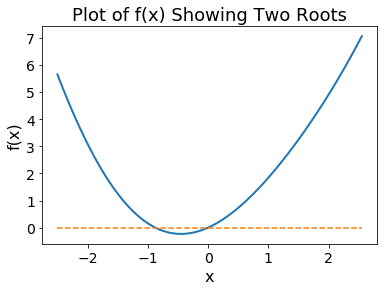

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(-2.5, 2.55, 1000)
f = x**2+np.sin(x)

plt.plot(x, f, linewidth = 2)
plt.plot(x, np.zeros((1000,)), '--')
plt.xlabel('x', fontsize = 16)
plt.ylabel('f(x)', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize =14)
plt.title('Plot of f(x) Showing Two Roots', fontsize = 18)

In [6]:
#implementation of Newton's method using AD20, without hardcoding the derivative

#function that we wish to find the roots of
def f(x):
    return x**2+ADmath.sin(x)

#Newton's method
x = ADnum(1, der = 1) #set an initial guess for the root

for i in range(1000):
    dx = -f(x).val/f(x).der #get change using ADnum attributes
    if np.abs(dx) < .000001: #check if within some tolerance
        print('Root found at: ' + str(x.val))
        break
    x = x+dx #update the guess



Root found at: 1.2094714295298077e-11


In the above, we found the root at zero.  Using a different initialization point, we can find the other root of the function.

In [7]:
y = ADnum(-1, der = 1) #set an initial guess for the root

for i in range(1000):
    dy = -f(y).val/f(y).der #get change using ADnum attributes
    if np.abs(dy) < .000001: #check if within some tolerance
        print('Root found at: ' + str(y.val))
        break
    y = y+dy #update the guess

Root found at: -0.8767262984818225


## 3.6 Future Extensions of the Basic Scalar Implementation
In the future, we will extend our basic package to find the gradient of scalar valued functions of multiple variables and the Jacobian of vector valued functions of vector valued input.  The following gives an outline of the usage of this future work.


### Functions of Multiple Variables
In case case with a function with more than one variable, the sequence is similar except when creating ADnum objects, the user must specify the total number of input variables, and the index of each variable in the gradient (so the the constructor of the ADnum class can correctly assign the derivative of the input variable):
    1. initialize each variable to a specific value where the function should be evaluated
    2. return the gradient as a numpy array when `f.der` is called 
    
```python
    # scalar function, multi variable
    >>> x = ADnum(2, ins = 2, ind = 0)
    >>> y = ADnum(3, ins = 2, ind = 1)
    >>> f = 3 * x**3 + 2 * y**3
    >>> print(f.val)
    >>> print(f.der)
    >>> print(x.val)
    >>> print(x.der)
    >>> print(y.val)
    >>> print(y.der)
    78
    np.array([36, 54])
    2
    np.array([1, 0])
    3
    np.array([0, 1])
```

### Vector-valued Functions
Each component of a vector valued function is just a scalar valued function of one or more input variables.  Thus, we can easily combine the previous results to get the Jacobian of a vector valued function.  By updating our methods to broadcast appropriately for an array, we can easily access these attributes,

```python
    >>> x = ADnum(2, ins = 2, ind = 0)
    >>> y = ADnum(3, ins = 2, ind = 1)
    >>> F = [x**2, x+y, 4*y]
    >>> F[1].der = [1 , 1]
    >>> F.der = [[4, 0], [1, 1], [0, 4]]
    >>> F[0].val = 4
```

In [8]:
x = ADnum(2, ins = 2, ind = 0)
y = ADnum(3, ins = 2, ind = 1)
F = [x**2, x+y, 4*y]

print(F[0].val)
print(F[0].der)
print(F[1].val)
print(F[1].der)
print(F[2].val)
print(F[2].der)


4.0
[4. 0.]
5.0
[1. 1.]
12.0
[0. 4.]


# 4. Software Organization
We would like to let the user use all numerical operations defined in our AD20 package. The AD20 package contains the `ADnum` module, the `ADmath` module, and the `ADgraph` module.

For either a scalar or vector input (either as a numpy array or a list), we will convert the input into an `ADnum` object, which can interact with the other modules. `ADnum` will also contain an overloaded version of basic operations, including addition, subtraction, multiplication, division, and exponentiation, so that the value and derivative are correctly updated after combining ADnum objects through each of these operations.

For special functions, we will use `ADmath` to compute the numerical values and the corresponding derivatives. In particular, `ADmath` will contain functions abs, exp, log, sin, cos, and tan.

To show a calculation graph, we use `ADgrap`h (and `ADtable`) to show the forward mode calculation process.

###  4.1 Directory Structure
    AD20/
        LICENSE
        README.md
        AD20/
            __init__.py
            ADnum.py
            ADnum_multivar.py
            ADmath.py
            ADmath_multivar.py
        Tests/
            __init__.py
            test_AD20.py
            test_AD20_multivar.py
    docs/
        Milestone 1.ipynb
        Milestone 2.ipynb
        Final Documentation.ipynb
        Final Presentation.ipynb
        figs/
    README.md
    setup.cfg
    requirements.txt
    LICENSE

###  4.2 Modules and Functionality
Our package consists of three main modules:

- **ADnum:** Contains the `ADnum` class (fully described below).  Create `ADnum` objects, which (inspired by the dual numbers) are defined by the attributes of a value and a derivative, from numbers or tuples.  Define all of the numerical operations for `ADnum` objects, so that they correctly track all derivatives.

- **ADmath:** Define elementary functions for `ADnum` objects, correctly tracking all of the derivatives.

and in future implementation,

- **ADgraph:** Create `ADgraph` objects, which can be used to show the computation process in either a graph (ADgraph.py) or table (ADtable.py)

###  4.3 Testing and Coverage
All tests are contained in the test_AD20.py file in the tests directory (see the repo structure above).  We will use pytest to perform our testing, using `TravisCI` and `Coveralls` for continuous integration and verifying code coverage respectively.  The test suite contains unit tests for all of the class methods implemented in ADnum and all the elementary functions implemented in ADmath.  This suite also contains several functions which are composed of several different operations and elementary functions for more advanced testing.

###  4.4 Package Distribution
For the final project submission, we will use `PIP` in `PyPi` to distribute our package. This will allow the user to install the package by using the command

    pip install AD20
    
Note that the current method for installing `AD20` through git is outlined in user interaction with numpy as the only current external dependency.

# 5. Implementation
Automatic differentiation is implemented through the use of `ADnum` objects and building the functions for which we want to take derivatives from these `ADnum` objects as well as the special elementary functions defined for `ADnum` objects in the `ADmath` module.  Each of these functions is itself an `ADnum` object so has an associated value and derivative which was updated when constructing the `ADnum` object through basic operations and elementary functions.

### 5.1 Core Data Structures
`ADnum` objects can be thought of as a tuple, where the first entry is the value and the second entry is the derivative.  Each of these attributes is either a scalar or a numpy array for ease of computation.  In the case of scalar input, the derivative is also a scalar.  For vector valued input, the derivative is the gradient of the function, stored as a numpy array.

In order to build and store computational graphs in the ADgraph module, we will use a dictionary to represent the graph, where the keys are the nodes of the graph, stored as `ADnum` objects, and the values associated with each key are the children of that node, stored as lists of ADnum objects.

### 5.2 Implemented Classes, Methods, and Attributes
The main class is the `ADnum` module, which is used to create `ADnum` objects.  It takes as input a single scalar input or a vector input (as a numpy array) and outputs an `ADnum` object.  The `ADnum` objects store the current value of the function and its derivative as attributes. 

These two attributes represent the two major functionalities desired of the class.  The `val` attribute is the ADnum object evaluated at the given value and the `der` attribute is its derivative at the given value. The constructor for this class, sets the value of the object and optionally also sets the value of its derivative,

```python
#ADnum.py
class ADnum():
    def __init__(self, value, **kwargs):
        try:
            value = np.array(value)
            value = value.astype(float)
            if 'der' not in kwargs:
                try:
                    ins = kwargs['ins']
                    ind = kwargs['ind']
                    der = np.zeros(ins) #need to change to matrix if len(val) is not 1
                    der[ind] = 1.0
                except:
                    raise KeyError('Must provide ins and ind if der not provided.')
            else:
                der = kwargs['der']
                der = np.array(der)
                der = der.astype(float)
                if 'ins' in kwargs:
                    ins = kwargs['ins']
                    if len(der) != ins:
                        raise ValueError('Shape of derivative does not match number of inputs.')
        except:
            raise ValueError('Value and derivative of ADnum object must be numeric.')
        self.val = value
        self.der = der
```

The `ADnum` class also includes methods to overload basic operations, __add__(), __radd__(), __mul__(), __rmul__(), __sub__(), __rsub__(), __truediv__(), __rtruediv__(), __pow__(), and __rpow__().  The result of overloading is that the adding, subtracting, multiplying, dividing, or exponentiating two `ADnum` objects returns an `ADnum` object as well as addition or multiplication by a constant.  For example, Y1, Y2, and Y3 are all recognized as `ADnum` objects:

```python
    X1= ADnum(7, der = 1)
    X2 = ADnum(15, der = 1)
    Y1 = X1 + X2
    Y2 = X1 * X2 + X1
    Y3 = 5 * X1 + X2 + 100
```

The resulting ADnum objects have both a value and derivative.  An example overloaded function is the following:


```python
#ADnum.py
def __mul__(self,other):
    try:
        return ADnum(self.val*other.val, der = self.val*other.der+self.der*other.val)
    except AttributeError:
        other = ADnum(other*np.ones(np.shape(self.val)), der = np.zeros(np.shape(self.der)))
        return self*other

def __rmul__(self,other):
    return self.__mul__(other)
```

By combining simple `ADnum` objects with basic operations and simple functions, we can construct any function we like.

```python
    X = ADnum(4, der = 1)
    F = X + ADmath.sin(4 - X)
```    
Where F is now an `ADnum` object, and ADmath.sin() is a specially defined sine function which takes as input an `ADnum` object and returns an `ADnum` object, which allows us to evaluate F and its derivative,

```python
    F.val = 4
    F.der = 0
    X.val = 4
    X.der = 1
```

In addition to the sine function used in the example above, the `ADmath` module also implements the trigonometric functions: `sin()`, `cos()`, `tan()`, `csc()`, `sec()`, `cot()`, the inverse trigonometric functions: `arcsin()`, `arccos()`, `arctan()`, the hyperbolic trig functions: `sinh()`, `cosh()`, `tanh()`, and the natural exponential `exp()` and natural logarithm `log()`.  All of the functions defined in the `ADmath` module define elementary functions of `ADnum` objects, so that the output is also an `ADnum` object with the val and deriv attributes updated appropriately.  For example,

```python
#ADmath.py
def sin(X):
    try:
        return ADnum(np.sin(X.val), der = np.cos(X.val)*X.der)
    except AttributeError:
        return np.sin(X)

def cos(X):
    try:
        return ADnum(np.cos(X.val), der = -np.sin(X.val)*X.der)
    except AttributeError:
        return np.cos(X)
```

We will also implement a class, `ADgraph`, for computational graphs.  The constructor takes as input a dictionary, as described above where the keys are nodes and values are the children of the key node.  The `ADgraph` class will be constructed from a dictionary, stored in the attribute dict.  This class will also have an attribute inputs, which stores the nodes which have no parents.  This class will implement methods to display the computational graphs and tables used to compute the derivatives of the `ADnum` objects.

### 5.3 External Dependencies
In order to implement the elementary functions, our `ADmath` relies on numpy’s implementation of the trigonometric functions, exponential functions, and natural logarithms for evaluation of these special functions, as demonstrated in the definition of the sine function for `ADnum` objects above.

We will also use numpy to implement matrix and vector multiplication in cases where the function is either vector valued or takes a vector as an input.

For graph and GUI creation, we used `networkx` and `tk` libraries. NetworkX is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks. TK is Python's de-facto standard GUI (Graphical User Interface) package. 

### 5.4 Elementary Functions
As outlined above, all elementary operations are defined for `ADnum` objects within the `ADnum` class and we have a special `ADmath` module which defines the trigonometric, exponential, and logarithmic functions to be used on `ADnum` objects, so that they both take as input and return an `ADnum` object, completing the set of defintions of all elementary operations and functions that can be composed to construct more complex functions.

### 5.5 Future Implementation
Our current implementation performs automatic differentiation for scalar functions of scalar variables.  Our constructor needs to be modified for functions of multiple inputs so that the `der` attribute will now be represented by a numpy array in these cases.  Minor revisions will also need to be applied to the methods defined in the `ADnum` and `ADmath` classes to ensure that these multidimensional `der` attributes are correctly updated, using the correct elementwise matrix multiplication for the numpy arrays.

We will also need to implement the functionality described in section 6, which includes an implementation of reverse mode for backpropagation and an implementation of the `ADgraph` class for building computational graphs and tables.

## 6. Project Extension

In order to expand our project from the basic forward mode automatic differentiation, we will make an additional development for pedagogical and application purposes.

### 6.1 Computational Graphs and Tables
We will implement the class `ADgraph` which stores the computational graph used to compute the derivatives in forward mode.  For every operation we create an additional node which represents another trace in the program.  This graph will be stored as an attribute of the `ADnum` objects.  For pedagogical purposes, we want to be able to visualize this process so we will use external packages for displaying graphs where the edge labels display the corresponding operation.  Correspondingly, we will also develop the functionality to display a table showing the trace, elementary operation, value, and derivative at each step.  Such a tool could be useful in the classroom for teaching students how automatic differentiation works.

This will require modifying all of our methods to correctly add to the dictionary which contains the computational graph information for each operation that we have previously overloaded.  This will also involve the added challenge of ensuring compatability between our program and an external program for visualizing graphs and tables.

